# **Hand Written Digit Prediction - Classification Analysis**


The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

## **Import Library**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Import Data**

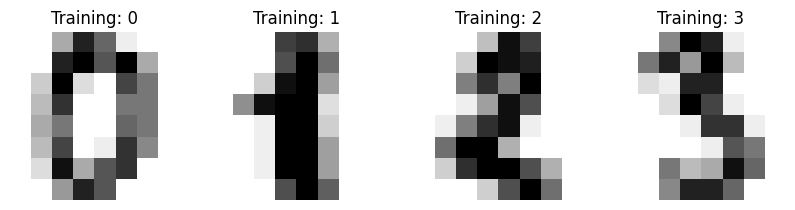

In [12]:
from sklearn.datasets import load_digits
data = load_digits()
_, axes=plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip (axes, data.images, data.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)


## **Data Preprossing**
**Flatten Image**
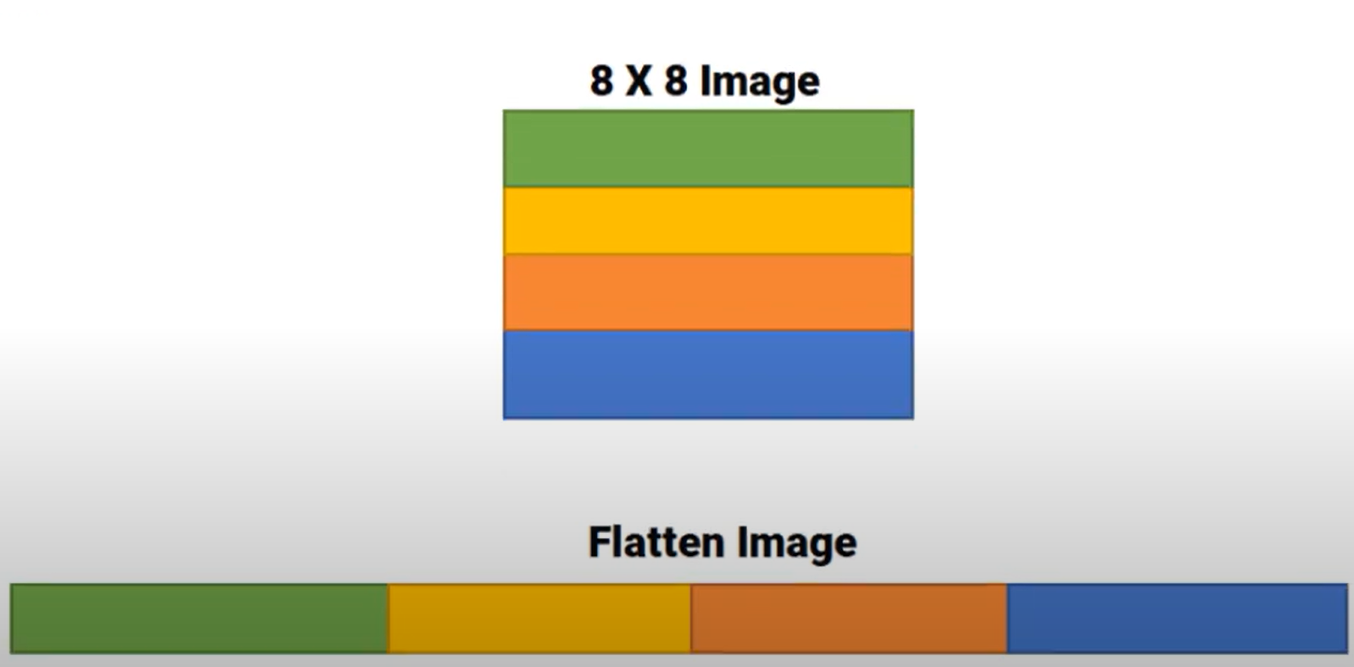




In [13]:
data.images.shape
n_samples=len(data.images)
new_data=data.images.reshape((n_samples,-1))
new_data[0]
new_data[0].shape

(64,)

## **Scaling Image Data**

In [14]:
new_data.min(),new_data.max()
new_data=new_data/16

In [15]:
new_data.min(),new_data.max(),new_data[0]

(0.0,
 1.0,
 array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
        0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
        0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
        0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
        0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
        0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
        0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
        0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]))

## **Get Train Test Splt**

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_data,data.target,train_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

## **Random Forest Model**

In [17]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

## **Predict Test Data**

In [18]:
y_pred=rf.predict(x_test)
y_pred

array([1, 3, 6, ..., 5, 0, 2])

## **Model Accuracy**

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[110,   0,   0,   0,   2,   0,   1,   0,   0,   0],
       [  0, 111,   0,   2,   3,   1,   0,   0,   2,   9],
       [  0,   0, 119,   4,   0,   0,   0,   1,   0,   2],
       [  0,   1,   0, 124,   0,   3,   0,   4,   8,   0],
       [  0,   0,   0,   0, 110,   0,   0,   8,   0,   1],
       [  1,   1,   0,   1,   1, 124,   0,   0,   0,   5],
       [  0,   1,   0,   0,   0,   0, 130,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126,   2,   0],
       [  0,   9,   0,   0,   0,   0,   0,   2, 104,   2],
       [  0,   0,   0,   3,   1,   1,   0,   0,   1, 117]])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       113
           1       0.90      0.87      0.88       128
           2       1.00      0.94      0.97       126
           3       0.93      0.89      0.91       140
           4       0.94      0.92      0.93       119
           5       0.96      0.93      0.95       133
           6       0.99      0.99      0.99       131
           7       0.89      0.98      0.94       128
           8       0.89      0.89      0.89       117
           9       0.86      0.95      0.90       123

    accuracy                           0.93      1258
   macro avg       0.94      0.93      0.93      1258
weighted avg       0.94      0.93      0.93      1258

